In [4]:
#meta 1/2/2021 my Data augmentation in fast.ai
#based on: Dipam Vasani 4/27/2019
#src https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa
#src https://www.kaggle.com/dipam7/data-augmentation-in-fastai
#This article visualizes various image transformations to understand what happens behind the scenes with data augmentation.

#based on: my-fastai-project/kaggle_resources/code_others/dipam7_data-augmentation-in-fastai.ipynb
#input: 1 file
#output: visualizations, mostly as is from src

#1/23/2021 DATA AUGMENTATION IN CV
#     Explorative
#     Image Basics: fast.ai vs PIL image
#     Image changes
#     Image transformations

#here 1/26/2021 DATA AUGMENTATION IN CV - FAST.AI v1
#     version fastai==1.0.51


In [5]:
#!pip freeze 
#lookup version fastai==1.0.51

In [6]:
from fastai.vision import *

In [7]:
#define variables and functions

def get_ex(): return open_image('../input/adorable-cat/adorable_cat.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]


# Data Augmentation in CV
with one image

## 0.0 Image Basics
fast.ai vs PIL

torch.Size([3, 720, 1280])


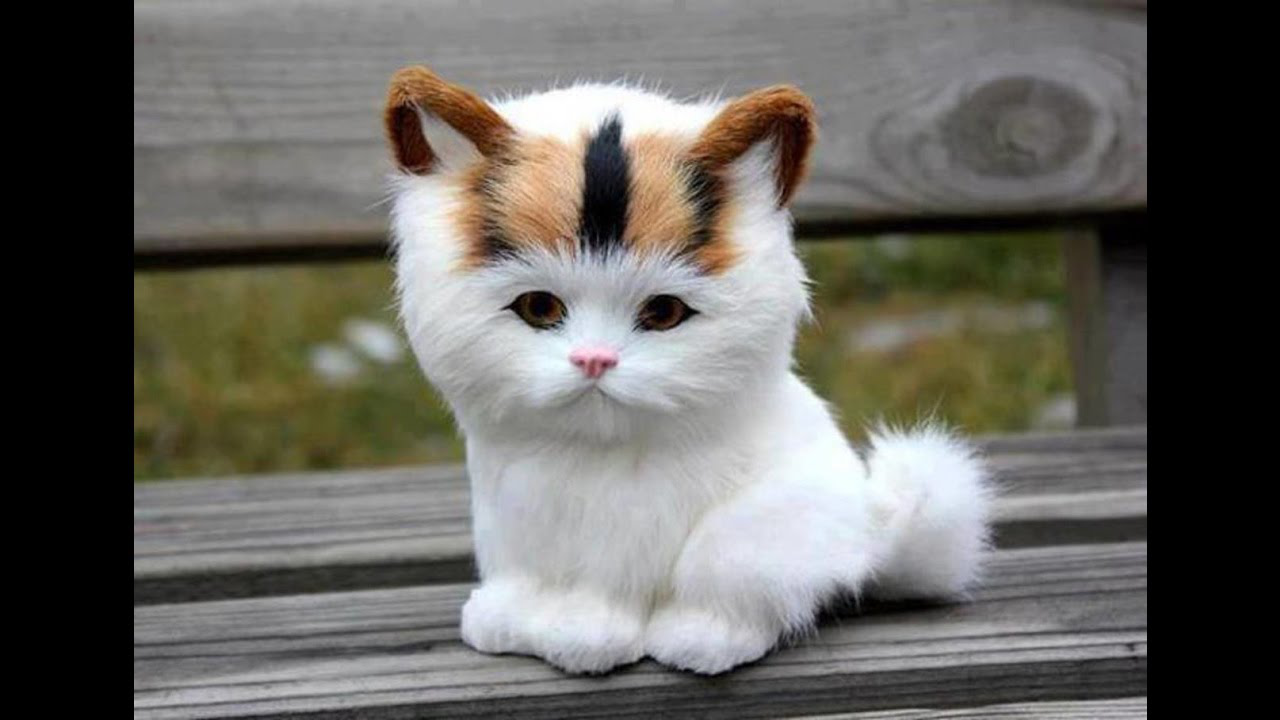

In [8]:
#raw image
img = open_image('../input/adorable-cat/adorable_cat.jpg') #class fastai.vision.image.Image
print(img.shape)
img

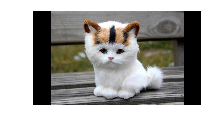

In [9]:
img.show()

### 0.1 Image Resize

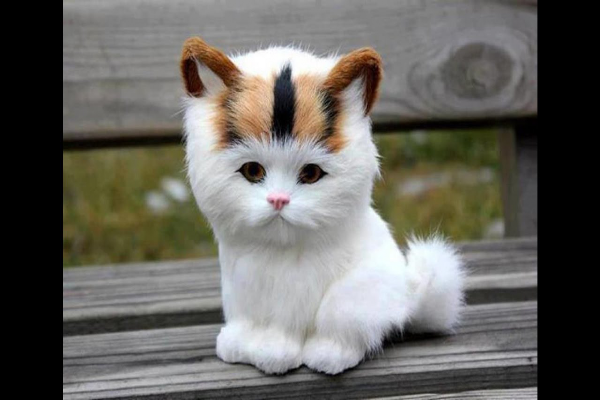

In [10]:
#class fastai.vision.image.Image
img_fa = open_image('../input/adorable-cat/adorable_cat.jpg')
# resize only accepts one int or a TensorImageSize, which is a tuple of size 3
img_fa.resize(torch.Size([img_fa.shape[0],400,600])) #inplace


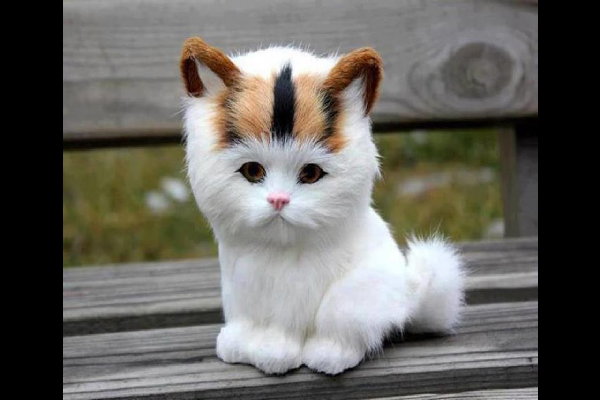

In [11]:
from PIL import Image
img_pil = Image.open('../input/adorable-cat/adorable_cat.jpg') #class PIL.JpegImagePlugin.JpegImageFile
img_pil.resize((600, 400), Image.NEAREST)


In [12]:
img_pil.info, (img_pil.layers, img_pil.size)


({'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)},
 (3, (1280, 720)))

## 1. Direct Image Changes

### 1.1 Image CropPad

In [13]:
#class fastai.vision.image.Image
img = open_image('../input/adorable-cat/adorable_cat.jpg')

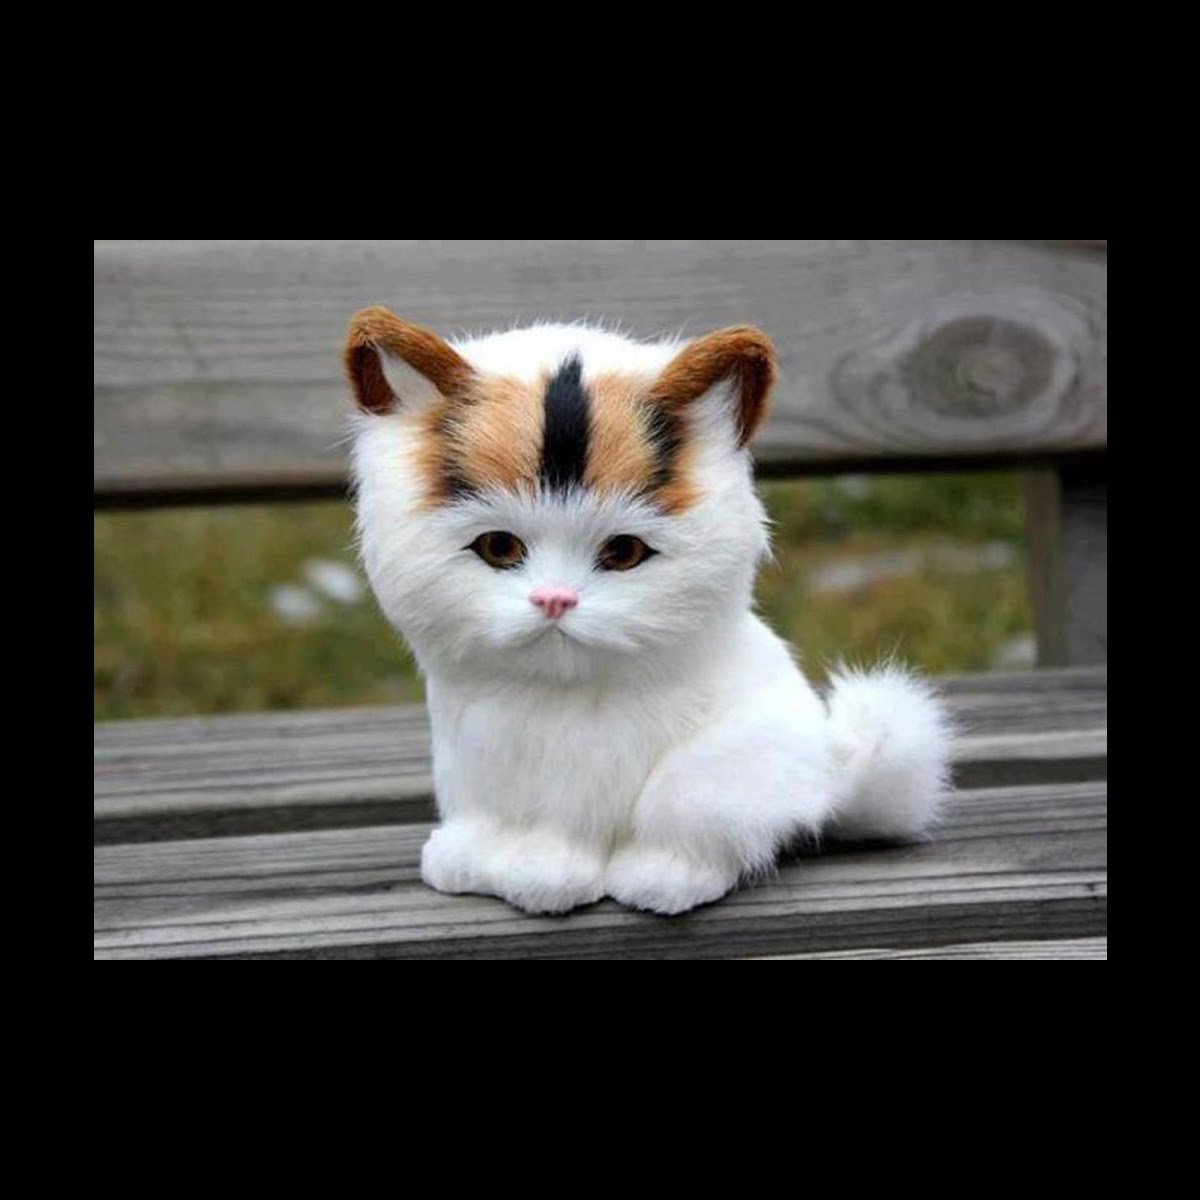

In [14]:
img.crop_pad(1200, padding_mode='zeros') #inplace
img

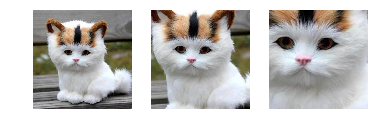

In [15]:
_,axs = plt.subplots(1,3)
for ax,sz in zip(axs.flatten(), [700, 500, 300]):
    show_image(img.crop_pad(sz, padding_mode='zeros'), ax=ax);


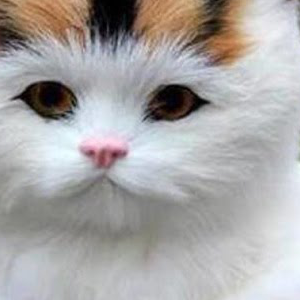

In [16]:
#img ends up to be
img

### 1.2 Image Zoom

In [17]:
#class fastai.vision.image.Image
img = open_image('../input/adorable-cat/adorable_cat.jpg')

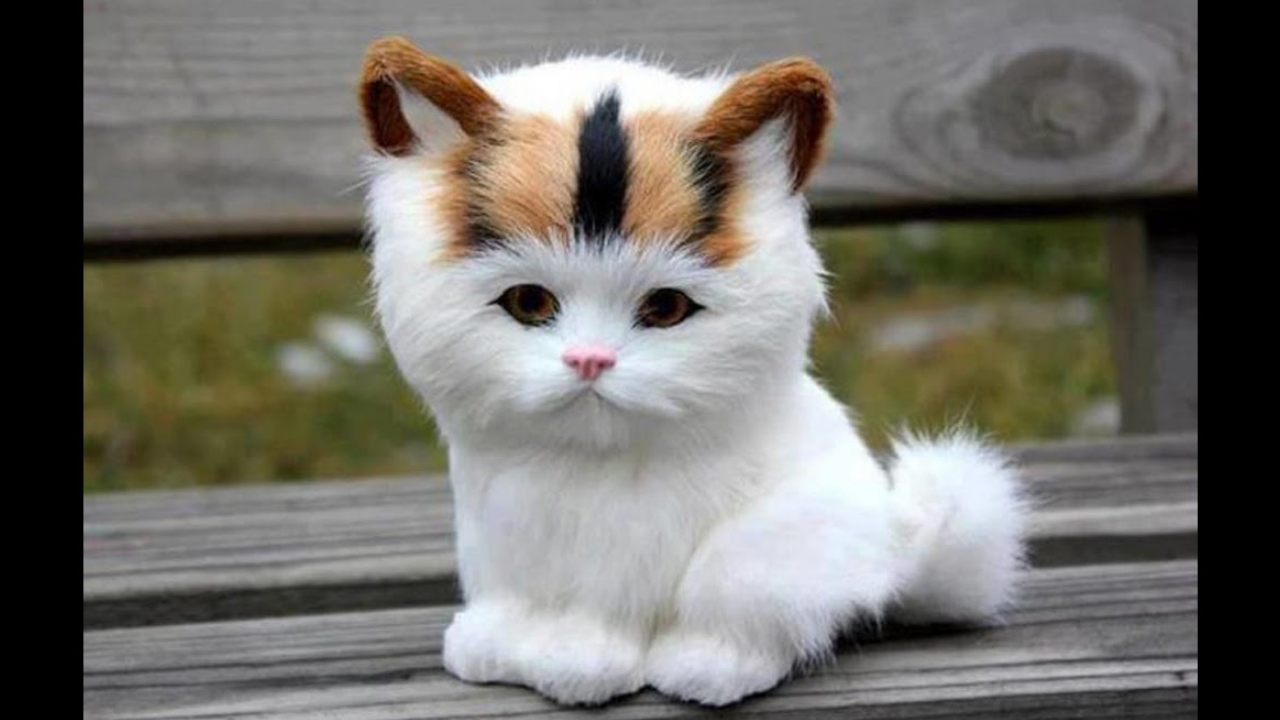

In [18]:
img.zoom(1.1)

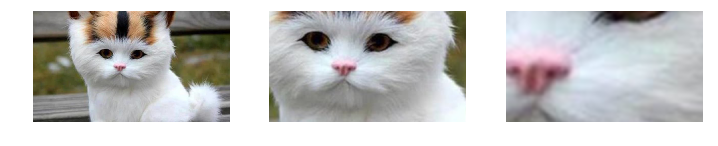

In [19]:
_,axs = plt.subplots(1,3, figsize=(12,4))
for ax,scale in zip(axs.flatten(), [1.5, 2.0, 3.0]):
    show_image(img.zoom(scale), ax=ax);


In [20]:
#img ends up to be
#img

## 2. Transforms

In [21]:
#class fastai.vision.image.Image
img = open_image('../input/adorable-cat/adorable_cat.jpg')

- no transforms

In [22]:
tfms = None
tfms.__class__


NoneType

### 2.1 Rotate transform

In [23]:
#rotate
tfms = get_transforms(max_rotate=25)

print(len(tfms))
tfms

2


([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-25, 25)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolve

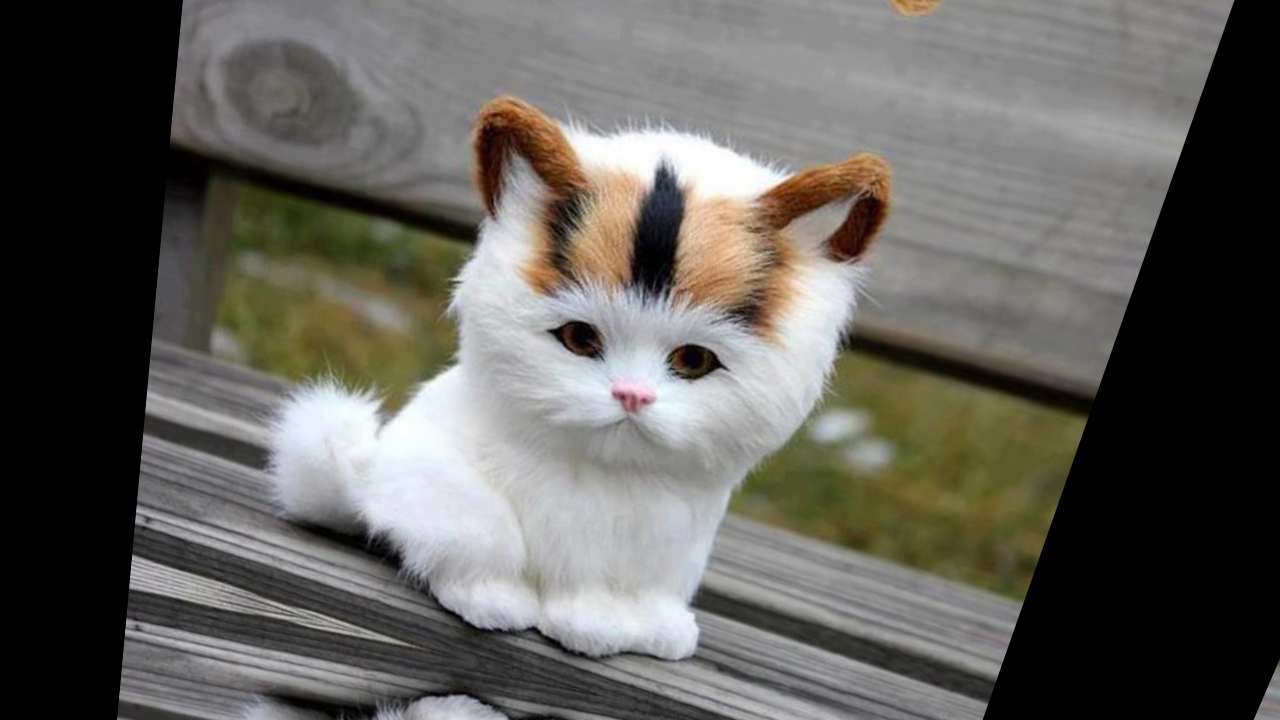

In [24]:
#class fastai.vision.image.Image
img_rotate = img.apply_tfms(tfms[0]) #original size
img_rotate

Display multiple transform results

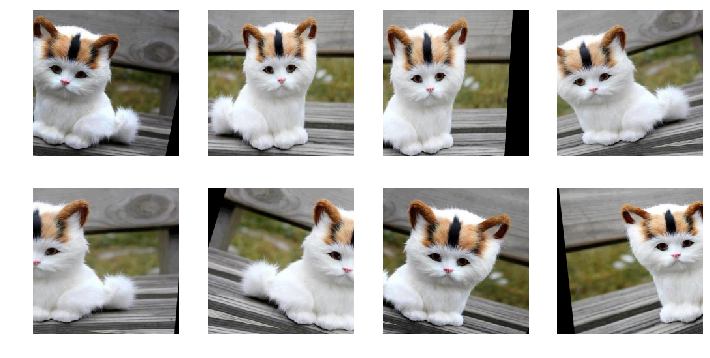

In [25]:
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfms[0], get_ex(), size=224)
    img.show(ax=ax)

In [26]:
'''#fn plots_f
this_rows = 2
this_cols = 4

print("grid {:d} x {:d}".format(this_rows,this_cols))

#draw grid of transformed images
for i,ax in enumerate(plt.subplots(this_rows,this_cols,figsize=(12,6))[1].flatten()):
    get_ex().apply_tfms(tfms[0], size=224).show(ax=ax)
'''

'#fn plots_f\nthis_rows = 2\nthis_cols = 4\n\nprint("grid {:d} x {:d}".format(this_rows,this_cols))\n\n#draw grid of transformed images\nfor i,ax in enumerate(plt.subplots(this_rows,this_cols,figsize=(12,6))[1].flatten()):\n    get_ex().apply_tfms(tfms[0], size=224).show(ax=ax)\n'

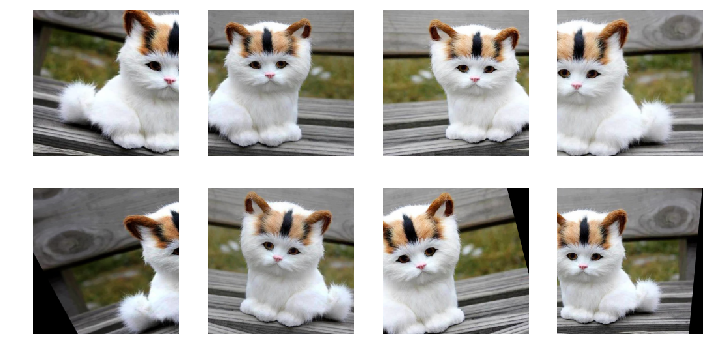

In [27]:
plots_f(2, 4, 12, 6, size=224)

### 2.2 More Transforms

2


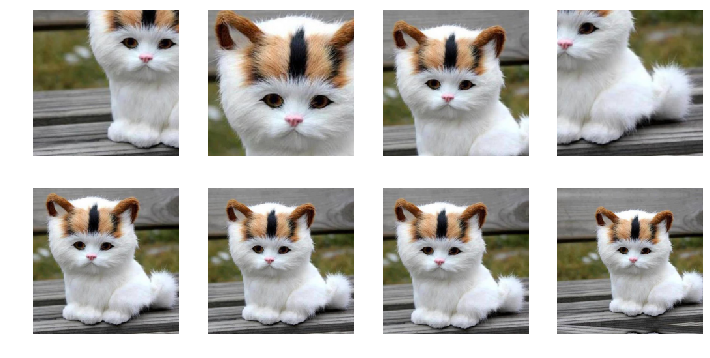

In [28]:
#random zoom and crop
tfms = zoom_crop(scale=(0.75,2), do_rand=True) #diff scales, diff zoom
#tfms = zoom_crop(scale=(0.75,2), do_rand=False) #diff scales, same zoom
print(len(tfms))

plots_f(2, 4, 12, 6, size=224)

1


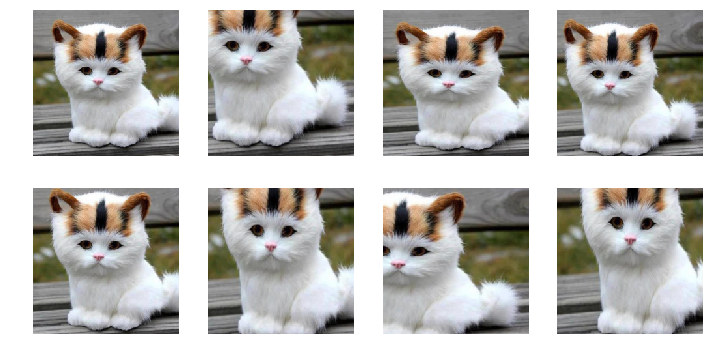

In [29]:
#random resize and crop
tfms = [rand_resize_crop(224)] #list?
#tfms = rand_resize_crop(224) #not list?
print(len(tfms))

plots_f(2, 4, 12, 6, size=224)

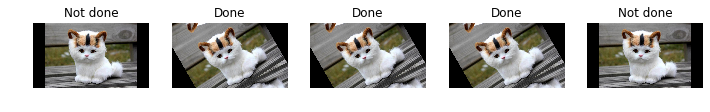

In [30]:
#rotate w/ p=.5
# passing a probability to a function
tfm = [rotate(degrees=30, p=0.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)

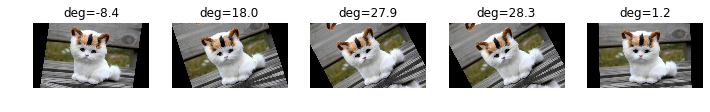

In [31]:
#rotate degrees range
tfm = [rotate(degrees=(-30,30))]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)

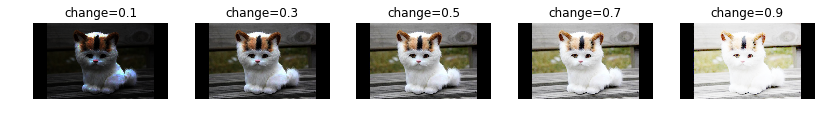

In [32]:
# brightness
fig, axs = plt.subplots(1,5,figsize=(14,8))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

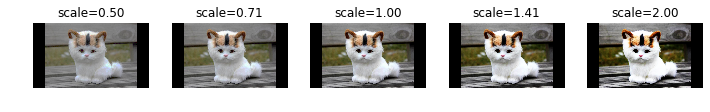

In [33]:
# contrast
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

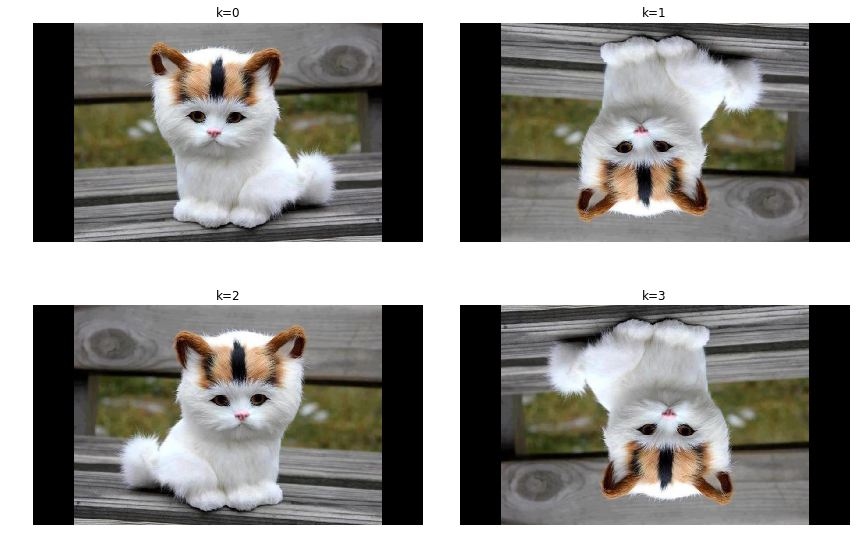

In [34]:
# dihedral
fig, axs = plt.subplots(2,2,figsize=(12,8))
for k, ax in enumerate(axs.flatten()):
    dihedral(get_ex(), k).show(ax=ax, title=f'k={k}')
plt.tight_layout()

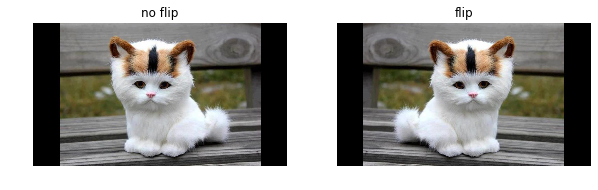

In [35]:
#flip or not
fig, axs = plt.subplots(1,2,figsize=(10,8))
get_ex().show(ax=axs[0], title=f'no flip')
flip_lr(get_ex()).show(ax=axs[1], title=f'flip')

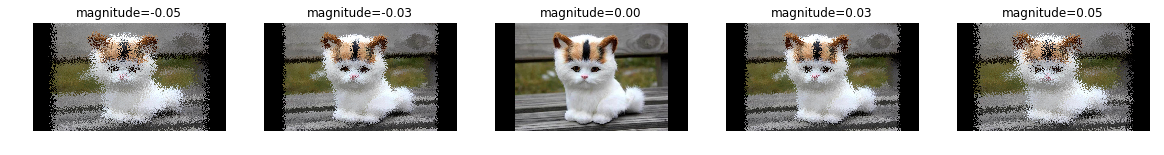

In [36]:
# jitter
fig, axs = plt.subplots(1,5,figsize=(20,8))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')

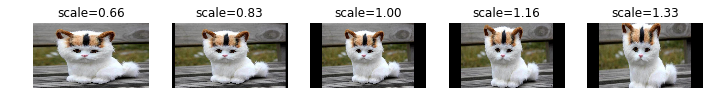

In [37]:
# squish
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(0.66,1.33,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')

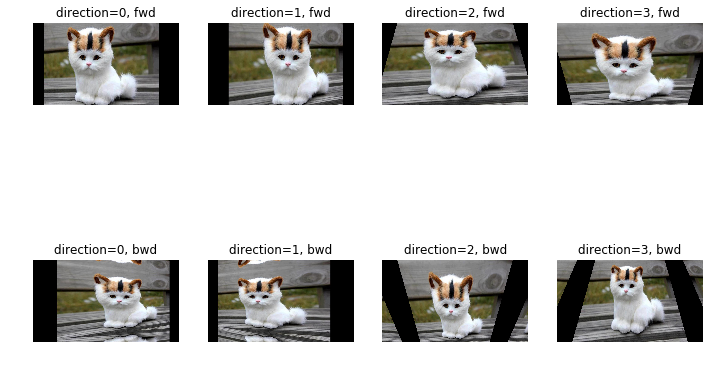

In [38]:
# tilt
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i in range(4):
    get_ex().tilt(i, 0.4).show(ax=axs[0,i], title=f'direction={i}, fwd')
    get_ex().tilt(i, -0.4).show(ax=axs[1,i], title=f'direction={i}, bwd')

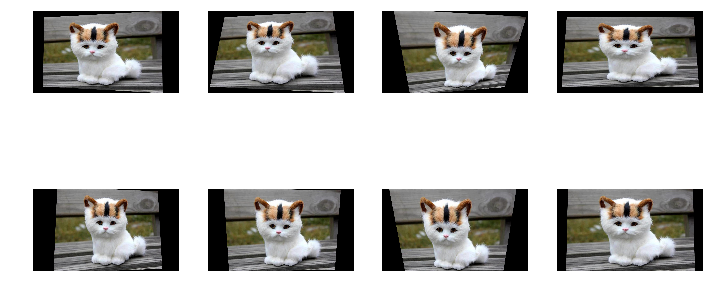

In [39]:
# symm warp
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='zeros')
    img.show(ax=ax)